In [1]:
import pandas as pd
import seaborn as sns

data = sns.load_dataset('titanic')

In [2]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
pd.Series(data.columns)

0        survived
1          pclass
2             sex
3             age
4           sibsp
5           parch
6            fare
7        embarked
8           class
9             who
10     adult_male
11           deck
12    embark_town
13          alive
14          alone
dtype: object

In [9]:
data['family_size'] = data['sibsp'] + data['parch'] + 1

In [10]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


# 모델 학습

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 원본 데이터 준비
df_origin = sns.load_dataset('titanic')
df_origin.dropna(subset=['age', 'embarked'], inplace=True) # 결측치 제거
df_origin = pd.get_dummies(df_origin, columns=['sex', 'embarked'], drop_first=True)

# 피쳐와 타깃 분리
X_origin = df_origin[['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']]
y_origin = df_origin['survived']

# 학습과 테스트를 위한 데이터셋 분리
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_origin, y_origin, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 준비
model = LogisticRegression(max_iter=1000)

# 모델 학습 및 예측
model.fit(X_train_o, y_train_o)
pred_o = model.predict(X_test_o)
# 예측 결과와 테스트 정답값을 비교해서 정확도 구하기
accuracy_o = accuracy_score(y_test_o, pred_o)

In [12]:
print(f"Feature Engineering 적용 전 정확도: {accuracy_o:.4f}")

Feature Engineering 적용 전 정확도: 0.7972


In [44]:
# 피쳐 엔지니어링한 데이터 준비
data = sns.load_dataset('titanic')

In [45]:
data['family_size'] = data['sibsp'] + data['parch']

In [46]:
data.drop(['sibsp','parch'],axis=1,inplace=True)

In [47]:
data.drop(['alive','embark_town','class','who','adult_male','alone'],axis=1,inplace=True)

In [48]:
data.isna().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
fare           0.000000
embarked       0.002245
deck           0.772166
family_size    0.000000
dtype: float64

In [49]:
data[data['age'].isna()]

,survived,pclass,sex,age,fare,embarked,deck,family_size
5,0,3,male,NaN,8.4583,Q,NaN,0
17,1,2,male,NaN,13.0000,S,NaN,0
19,1,3,female,NaN,7.2250,C,NaN,0
26,0,3,male,NaN,7.2250,C,NaN,0
28,1,3,female,NaN,7.8792,Q,NaN,0
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,7.2292,C,NaN,0
863,0,3,female,NaN,69.5500,S,NaN,10
868,0,3,male,NaN,9.5000,S,NaN,0
878,0,3,male,NaN,7.8958,S,NaN,0


In [54]:
data['age'].fillna(data.groupby(['pclass', 'sex'])['age'].transform('median'), inplace=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

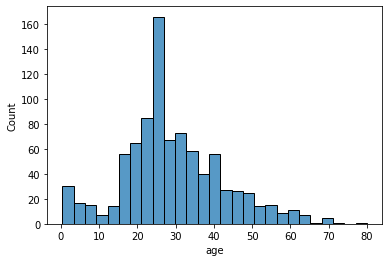

In [55]:
sns.histplot(data=data, x='age')

In [56]:
data.isna().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
fare           0.000000
embarked       0.002245
deck           0.772166
family_size    0.000000
dtype: float64

<AxesSubplot:xlabel='embarked', ylabel='Count'>

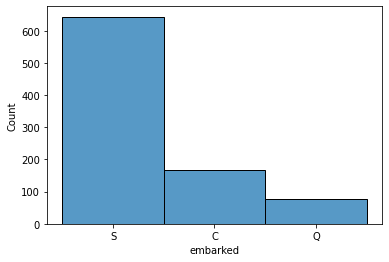

In [57]:
sns.histplot(data=data, x='embarked')

In [60]:
data['embarked'] = data['embarked'].fillna('S')

In [61]:
data.isna().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
fare           0.000000
embarked       0.000000
deck           0.772166
family_size    0.000000
dtype: float64

In [63]:
data.drop(columns=['deck'], inplace=True)

In [64]:
data.isna().mean()

survived       0.0
pclass         0.0
sex            0.0
age            0.0
fare           0.0
embarked       0.0
family_size    0.0
dtype: float64

In [65]:
data.describe()

,survived,pclass,age,fare,family_size
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.112424,32.204208,0.904602
std,0.486592,0.836071,13.304424,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,21.500000,7.910400,0.000000
50%,0.000000,3.000000,26.000000,14.454200,0.000000
75%,1.000000,3.000000,36.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,10.000000


In [66]:
# 범주형 변수 더미 인코딩
data = pd.get_dummies(data, columns=['sex', 'embarked'], drop_first=True)

In [67]:
data.head()

,survived,pclass,age,fare,family_size,sex_male,embarked_Q,embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


In [68]:
# 피쳐와 타깃 분리
X = data.drop('survived', axis=1)
y = data['survived']

# 학습과 테스트를 위한 데이터셋 분리
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)

model.fit(X_train_f, y_train_f)

pred_f = model.predict(X_test_f)
accuracy_f = accuracy_score(y_test_f, pred_f)


# 원본 데이터로 학습한 결과와 Feature Engineering 적용 데이터로 학습한 결과 비교
print(f"Feature Engineering 적용 전 정확도: {accuracy_o:.4f}")
print(f"Feature Engineering 적용 후 정확도: {accuracy_f:.4f}")

Feature Engineering 적용 전 정확도: 0.7972
Feature Engineering 적용 후 정확도: 0.8156


In [38]:
# 가족 규모 구간화
def family_group(size):
    if size == 1:
        return 'alone'
    elif size <= 4:
        return 'small'
    else:
        return 'large'

In [39]:
df['family_group'] = df['family_size'].apply(family_group)

In [40]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,family_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,small
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,small
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,alone
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,small
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,alone


In [43]:
# 피쳐와 타깃 분리
X = df[['pclass', 'age', 'alone','family_group_small', 'family_group_large', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']]
y = df['survived']

# 학습과 테스트를 위한 데이터셋 분리
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)

model.fit(X_train_f, y_train_f)

pred_f = model.predict(X_test_f)
accuracy_f = accuracy_score(y_test_f, pred_f)


# 원본 데이터로 학습한 결과와 Feature Engineering 적용 데이터로 학습한 결과 비교
print(f"Feature Engineering 적용 전 정확도: {accuracy_o:.4f}")
print(f"Feature Engineering 적용 후 정확도: {accuracy_f:.4f}")

Feature Engineering 적용 전 정확도: 0.7972
Feature Engineering 적용 후 정확도: 0.7972
